In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
import category_encoders as ce
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df_dataset = pd.read_csv('Family Income and Expenditure.csv')

region = list(df_dataset['Region'].unique())
main_source_of_income = list(df_dataset['Main Source of Income'].unique())
household_head_sex = list(df_dataset['Household Head Sex'].unique())
household_head_marital_status = list(df_dataset['Household Head Marital Status'].unique())
household_head_highest_grade_completed = list(df_dataset['Household Head Highest Grade Completed'].unique())
household_head_job_or_business_indicator = list(df_dataset['Household Head Job or Business Indicator'].unique())
household_head_occupation = list(df_dataset['Household Head Occupation'].unique())
household_head_class_of_worker = list(df_dataset['Household Head Class of Worker'].unique())
type_of_household = list(df_dataset['Type of Household'].unique())
type_of_buildingHouse = list(df_dataset['Type of Building/House'].unique())
type_of_roof = list(df_dataset['Type of Roof'].unique())
type_of_walls = list(df_dataset['Type of Walls'].unique())
tenure_status = list(df_dataset['Tenure Status'].unique())
toilet_facilities = list(df_dataset['Toilet Facilities'].unique())
main_source_of_water_supply = list(df_dataset['Main Source of Water Supply'].unique())

# correct typos in region names
df_dataset['Region'] = df_dataset['Region'].replace(' ARMM', 'ARMM')
df_dataset['Region'] = df_dataset['Region'].replace('IX - Zasmboanga Peninsula', 'IX - Zamboanga Peninsula')

# update region names
region = list(df_dataset['Region'].unique())

# Define the categorical columns
cat_cols = ['Region', 'Main Source of Income', 'Household Head Sex', 'Household Head Marital Status', 'Household Head Highest Grade Completed', 'Household Head Job or Business Indicator', 'Household Head Occupation', 'Household Head Class of Worker', 'Type of Household', 'Type of Building/House', 'Type of Roof', 'Type of Walls', 'Tenure Status', 'Toilet Facilities', 'Main Source of Water Supply', ]

# Create an instance of the TargetEncoder
encoder = ce.TargetEncoder(cols=cat_cols)

# Fit and transform the target encoder on the dataframe
df_encoded = encoder.fit_transform(df_dataset, df_dataset['Housing and water Expenditure'])

# Access the mapping
mapping = encoder.mapping

# Replace the original categorical columns with the target-encoded values
df_dataset[cat_cols] = df_encoded[cat_cols]

# Create a dictionary mapping the categorical columns to the target encoding
cat_dict_map = {}
for column in cat_cols:
    cat_dict_map[column] = list(mapping[column])[:-2]

convert_region = {k: v for k, v in zip(region, cat_dict_map['Region'])}
convert_main_source_of_income = {k: v for k, v in zip(main_source_of_income, cat_dict_map['Main Source of Income'])}
convert_household_head_sex = {k: v for k, v in zip(household_head_sex, cat_dict_map['Household Head Sex'])}
convert_household_head_marital_status = {k: v for k, v in zip(household_head_marital_status, cat_dict_map['Household Head Marital Status'])}
convert_household_head_highest_grade_completed = {k: v for k, v in zip(household_head_highest_grade_completed, cat_dict_map['Household Head Highest Grade Completed'])}
convert_household_head_job_or_business_indicator = {k: v for k, v in zip(household_head_job_or_business_indicator, cat_dict_map['Household Head Job or Business Indicator'])}
convert_household_head_occupation = {k: v for k, v in zip(household_head_occupation, cat_dict_map['Household Head Occupation'])}
convert_household_head_class_of_worker = {k: v for k, v in zip(household_head_class_of_worker, cat_dict_map['Household Head Class of Worker'])}
convert_type_of_household = {k: v for k, v in zip(type_of_household, cat_dict_map['Type of Household'])}
convert_type_of_buildingHouse = {k: v for k, v in zip(type_of_buildingHouse, cat_dict_map['Type of Building/House'])}
convert_type_of_roof = {k: v for k, v in zip(type_of_roof, cat_dict_map['Type of Roof'])}
convert_type_of_walls = {k: v for k, v in zip(type_of_walls, cat_dict_map['Type of Walls'])}
convert_tenure_status = {k: v for k, v in zip(tenure_status, cat_dict_map['Tenure Status'])}
convert_toilet_facilities = {k: v for k, v in zip(toilet_facilities, cat_dict_map['Toilet Facilities'])}
convert_main_source_of_water_supply = {k: v for k, v in zip(main_source_of_water_supply, cat_dict_map['Main Source of Water Supply'])}

# columns = ['Housing and water Expenditure', 'Total Household Income', 'Region', 'Imputed House Rental Value', 'Total Number of Family members', 'Type of Building/House', 'House Floor Area', 'House Age', 'Number of bedrooms', 'Main Source of Water Supply', 'Number of CD/VCD/DVD', 'Number of Component/Stereo set', 'Number of Refrigerator/Freezer', 'Number of Washing Machine', 'Number of Airconditioner', 'Number of Personal Computer']
# df_dataset = df_dataset.filter(columns, axis=1)

X = df_dataset.drop(['Housing and water Expenditure'], axis=1)
y = df_dataset['Housing and water Expenditure']

X_train, X_temp, Y_train, Y_temp = train_test_split(X, y, test_size = 0.3, random_state=2)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.5, random_state=2)

# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(59,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
# compile the keras model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
# fit the keras model on the dataset
model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=1000)

Epoch 1/1000
909/909 [==============================] - 2s 2ms/step - loss: 9329.0488 - mean_squared_error: 443284896.0000 - root_mean_squared_error: 21054.3320 - mean_absolute_error: 9329.0488 - val_loss: 7415.3369 - val_mean_squared_error: 369144384.0000 - val_root_mean_squared_error: 19213.1309 - val_mean_absolute_error: 7415.3369
Epoch 2/1000
909/909 [==============================] - 1s 2ms/step - loss: 7327.5996 - mean_squared_error: 304648672.0000 - root_mean_squared_error: 17454.1875 - mean_absolute_error: 7327.5996 - val_loss: 7324.4810 - val_mean_squared_error: 300323648.0000 - val_root_mean_squared_error: 17329.8477 - val_mean_absolute_error: 7324.4810
Epoch 3/1000
909/909 [==============================] - 1s 1ms/step - loss: 7173.3794 - mean_squared_error: 284540800.0000 - root_mean_squared_error: 16868.3379 - mean_absolute_error: 7173.3794 - val_loss: 7047.3516 - val_mean_squared_error: 307768864.0000 - val_root_mean_squared_error: 17543.3418 - val_mean_absolute_error: 70

In [27]:
# evaluate the keras model
# _, accuracy = model.evaluate(X, y)
# print('Accuracy: %.2f' % (accuracy*100))
_, MSE, RMSE, MAE = model.evaluate(X_test, Y_test)
print("MSE", MSE)
print("RMSE", RMSE)
print("MAE", MAE)

195/195 [==============================] - 0s 1ms/step - loss: 6443.5493 - mean_squared_error: 215029712.0000 - root_mean_squared_error: 14663.8916 - mean_absolute_error: 6443.5493
MSE 215029712.0
RMSE 14663.8916015625
MAE 6443.54931640625


195/195 [==============================] - 0s 842us/step


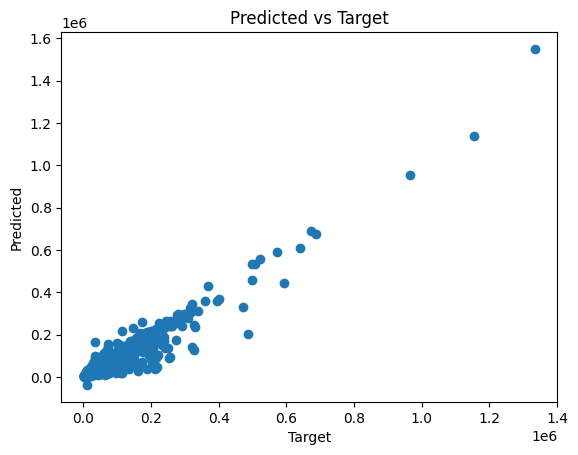

In [29]:
Y_pred = model.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel('Target')
plt.ylabel('Predicted')
plt.title('Predicted vs Target')
plt.show()